In [53]:
import matplotlib.pyplot as plt 
font = {'family' : 'normal','size'   : 14}
import matplotlib
matplotlib.rc('font', **font)

import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3020 - Introducción a Ciencia de Datos

## Tutorial 9: Análisis Exploratorio Multivariado.
---

## Introducción.

Para ilustrar el proceso y herramientas del análisis exploratorio multivariado, consideraremos como caso de estudio para este tutorial, un conjunto de datos relativo a propiedades en venta en Colombia y Argentina.


Este dataset fue generado con el fin de crear un modelo para predecir el valor de venta de propiedades en Argentina y Colombia, y contiene datos relativos a la ubicación, número de habitaciones y baños, superficie y precio de propiedades en distintas ciudades de dichos países. 

La fuente de datos está descrita en el siguiente link:

https://www.datasource.ai/en/home/data-science-competitions-for-startups/real-estate-price-forecast


In [52]:
df=pd.read_csv('https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/semana5/properties.csv')
df

,pais,provincia_departamento,ciudad,property_type,rooms,bedrooms,bathrooms,surface_total,price_USD
0,Argentina,Capital Federal,Villa Crespo,Departamento,2.0,1.0,1.0,37.0,85000.0
1,Argentina,Capital Federal,Palermo,Departamento,6.0,4.0,4.0,300.0,1590000.0
2,Colombia,Atlántico,Barranquilla,Apartamento,3.0,3.0,3.0,95.0,85329.0
3,Colombia,Valle del Cauca,Cali,Apartamento,3.0,3.0,1.0,60.0,22846.0
4,Argentina,Capital Federal,Balvanera,Departamento,3.0,2.0,1.0,45.0,80000.0
...,...,...,...,...,...,...,...,...,...
25655,Colombia,Antioquia,Bello,Apartamento,3.0,3.0,2.0,61.0,41288.0
25656,Argentina,Capital Federal,Caballito,Departamento,2.0,1.0,1.0,40.0,85000.0
25657,Argentina,Capital Federal,Villa del Parque,Departamento,2.0,1.0,1.0,61.0,185700.0
25658,Argentina,Capital Federal,San Cristobal,Departamento,3.0,2.0,1.0,53.0,120000.0


In [10]:
df['price_USD_m2']=df['price_USD']/df['surface_total']

## 1. Estadísticas descriptivas.

In [11]:
pv=pd.pivot_table(df,index='pais',
                  values=['price_USD_m2','surface_total'],
                  aggfunc=['mean','count'])
pv.round(1)

mean                      count              
          price_USD_m2 surface_total price_USD_m2 surface_total
pais                                                           
Argentina       2466.3          66.2        16892         16892
Colombia        1180.2         103.5         8768          8768

In [12]:
pv=pd.pivot_table(df,columns='pais',index='rooms',
                  values=['price_USD_m2','surface_total'],
                  aggfunc={'price_USD_m2':['mean','count']})
pv

price_USD_m2                                   
             count                  mean             
pais     Argentina Colombia    Argentina     Colombia
rooms                                                
1.0         1797.0    625.0  2572.055504  1558.556643
2.0         7387.0   2087.0  2323.169165  1242.190760
3.0         4590.0   5563.0  2430.193081  1120.421833
4.0         2144.0    455.0  2738.599158  1140.182636
5.0          578.0     31.0  2868.127978   861.152887
6.0          237.0      5.0  3226.953231   441.659764
7.0           93.0      2.0  3129.844524   593.813508
8.0           47.0      NaN  2142.963453          NaN
9.0            8.0      NaN  2049.817321          NaN
10.0           6.0      NaN  1391.155324          NaN
11.0           2.0      NaN  3087.388373          NaN
12.0           3.0      NaN  1967.845274          NaN

In [13]:
#Hay muy pocos datos de propiedades con más de 8 habitaciones para incluir en el análisis.
df=df[df['rooms']<8.0]

## 2. Análisis exploratorio gráfico.


### ¿Cómo se distribuyen los datos por provincia en cada país?

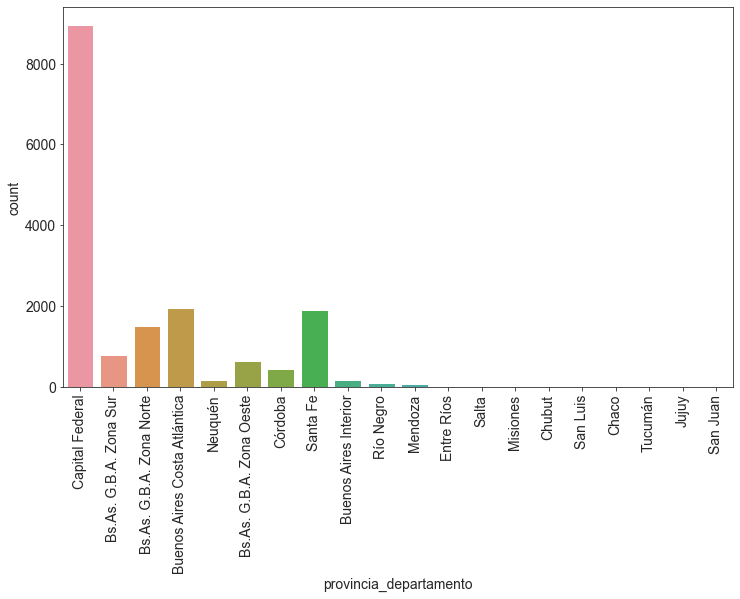

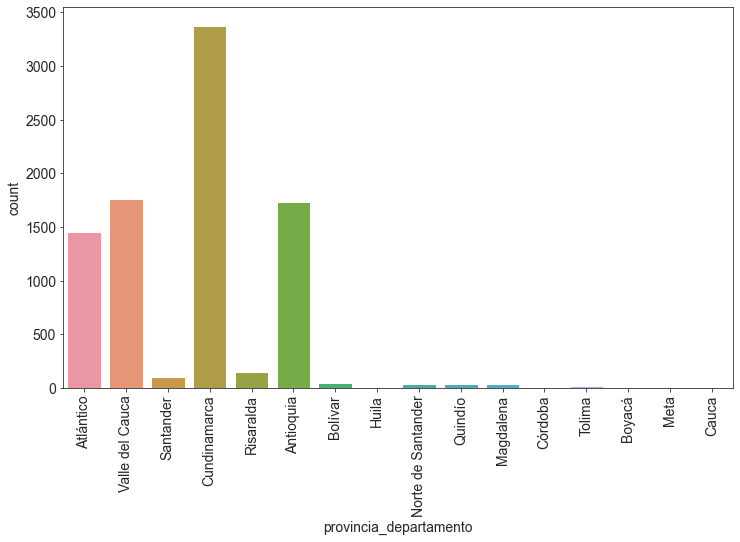

In [14]:
import seaborn as sns

for pais in ['Argentina','Colombia']:
    fig=plt.figure(figsize=(12,7))
    ax=fig.add_subplot(111)

    da=df[df['pais']==pais]
    sns.countplot(data=da,ax=ax,x='provincia_departamento');
    plt.xticks(rotation = 90); # Rotates X-Axis Ticks by 45-degrees;

### ¿Cómo se comparan las distribuciones de precios en cada país?

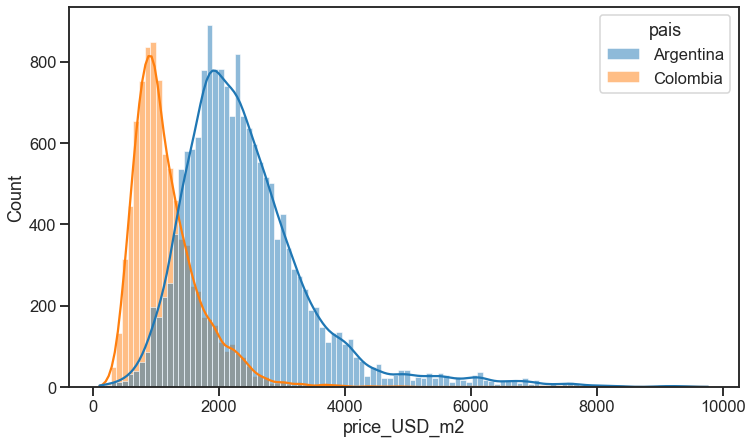

In [29]:
fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(111)
sns.histplot(data=df,x='price_USD_m2',hue='pais',ax=ax,kde=True);

### ¿Cómo se relaciona el precio por m2, con características de la propiedad como: nº habitaciones, nº baños, país?

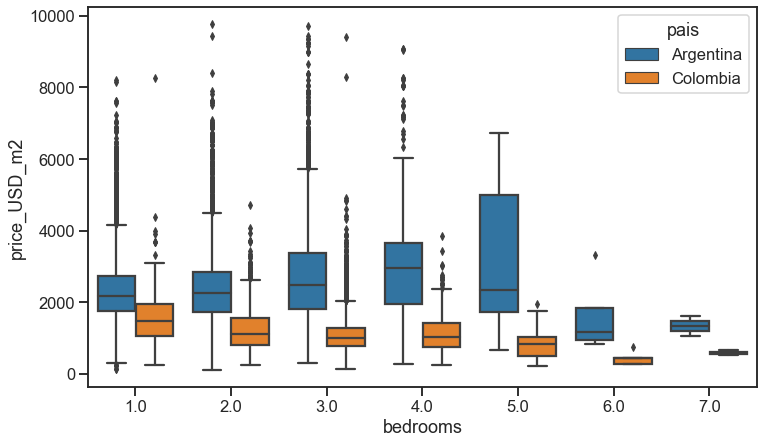

In [25]:
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(111)

sns.boxplot(data=df,y='price_USD_m2',ax=ax,x='bedrooms',hue='pais');


In [22]:
#Outliers:
df=df[df['price_USD_m2']<10000]

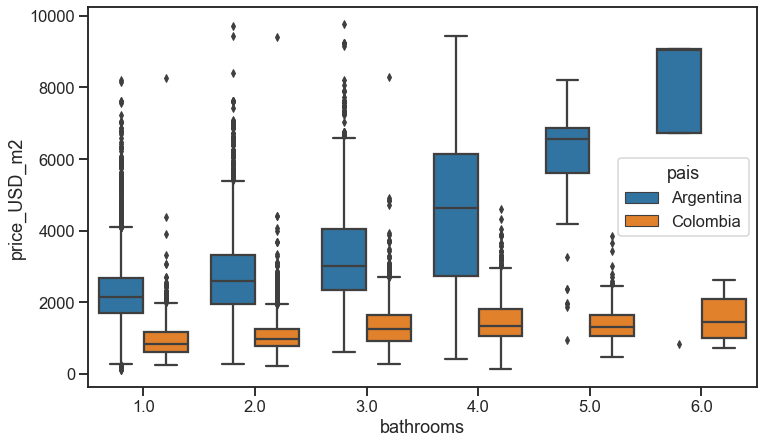

In [48]:
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(111)

sns.boxplot(data=df,y='price_USD_m2',ax=ax,x='bathrooms',hue='pais');


**Notas:** Revise la documentación de `seaborn.histplot`y verifique cómo cambian sus gráficos al cambiar los argumentos:`bins`,`stat`,`kde`y otros que llamen su atención.

#### Matriz de correlación.

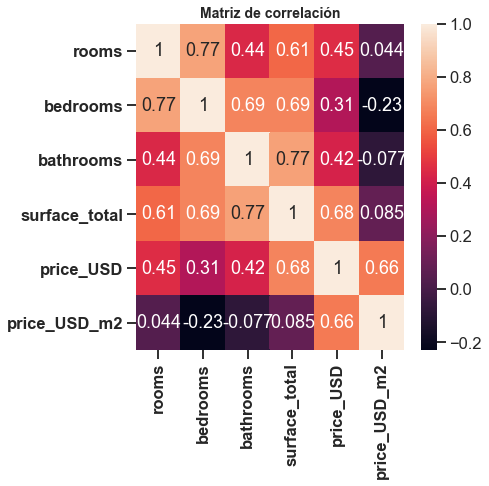

In [50]:
f, ax = plt.subplots(figsize=(6,6))

sns.heatmap(df.corr(),annot=True);
plt.title('Matriz de correlación', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold', rotation=0);

#### Gráficos de dispersión.

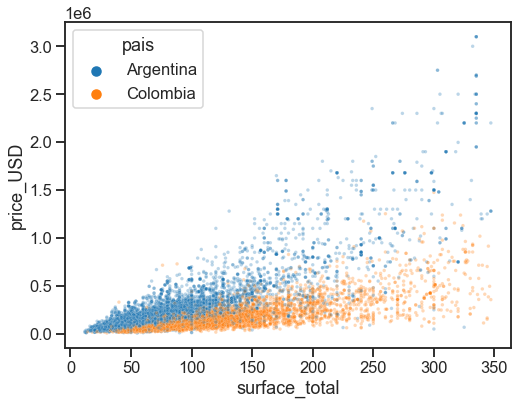

In [37]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
sns.scatterplot(data=df, y="price_USD", x="surface_total",ax=ax,s=12,hue='pais',alpha=0.3);
#ax.set_ylim(0,1.5e6)
fig.savefig('scatter_multi.jpg',dpi=300)

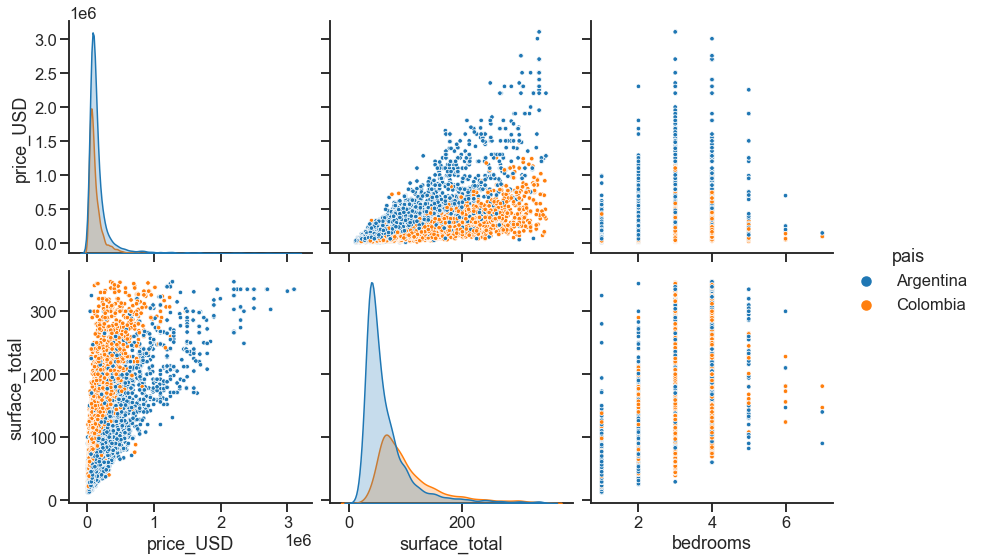

In [51]:
sns.pairplot(data=df, y_vars=['price_USD','surface_total'],x_vars=['price_USD','surface_total','bedrooms'],hue='pais',
             kind="scatter",height=4,plot_kws=dict(marker="."))

### ¿Influye la provincia en el precio por m2?

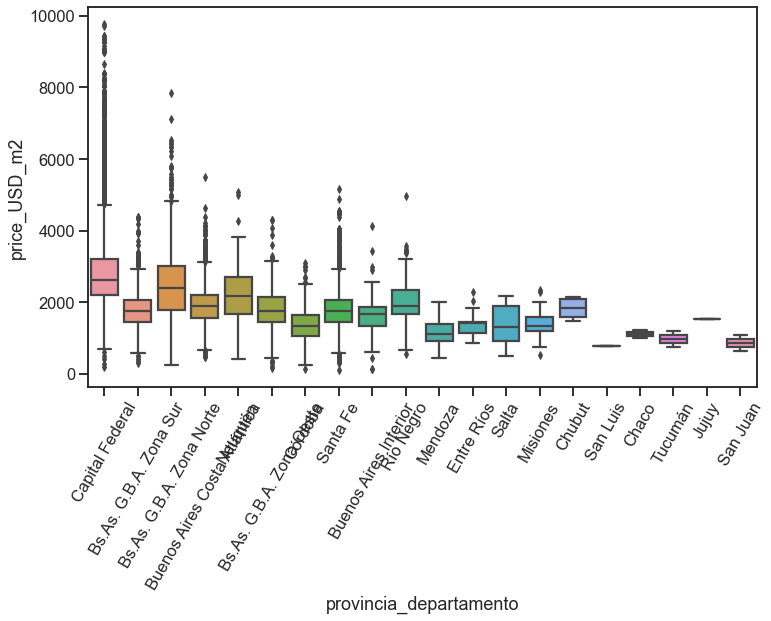

In [47]:
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(111)

sns.boxplot(data=df[df['pais']=='Argentina'],y='price_USD_m2',ax=ax,x='provincia_departamento')
plt.xticks(rotation=60);

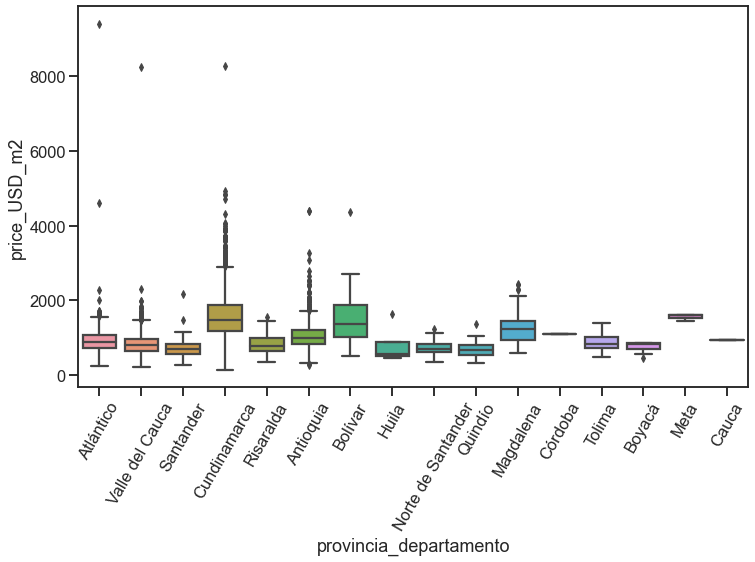

In [46]:
import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(111)

sns.boxplot(data=df[df['pais']=='Colombia'],y='price_USD_m2',ax=ax,x='provincia_departamento');
plt.xticks(rotation=60);

#### Conclusiones:

- Para ambos países, hay una correlación entre precio de arriendo, y superficie total. Es decir, puede usarse el precio_USD_m2 como variable predictora.
- Pero, la relación es distinta entre países. El país es una variable categórica relevante a considerar en un modelo predictivo.
- Para cada país, también puede ser necesario diferenciar por provincia.
- Sobre todo en Argentina, el precio_USD_M2 tiende a aumentar con el número de baños. ¿Puede ser una señal de propiedades de alto nivel, y por lo tanto más caras?
- Propiedades con más de 6-7 habitaciones son pocas, y muestran comportamientos anómales. Posiblemente convenga excluir estos datos del análisis.